In [1]:
from damage_generator.scans import load_scans, load_all_synthetic_images
from damage_generator.generate_masks import create_random_mask, create_random_mask_with_transparency
import os
import argparse
import cv2 as cv
import uuid
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### **Default parameters**

In [2]:
height = 1024
width = 1024

synthetic = False
rescale = True
binarized = True
verbose = False
uniform = False

1. Extract real artifacts from annotations

In [3]:
scans_path = "/scans/"
synthetic_path = "/synthetic/"

abs_path = os.path.abspath("")
scans_path = abs_path + scans_path
synthetic_path = os.path.dirname(os.path.normpath(abs_path))+ synthetic_path
df_artifacts = load_scans(scans_path, verbose=verbose)


### Optionally use synthetic artifacts ###
if synthetic:
    df_synthetic = df_synthetic_articats = load_all_synthetic_images(synthetic_path, verbose=verbose)
else: df_synthetic = None

df_per_patch_counts = df_artifacts.groupby(['Quandrant', 'Type']).size().to_frame('Counts').reset_index()

Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (1).jpg
Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (2).jpg
Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (3).jpg
Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (4).jpg
Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (5).jpg
Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (6).jpg
Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (7).jpg
Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (8).jpg
Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (9).jpg
Loading dust scan  /home/priubrogent/tfg/FilmDamageSimulator/scans/Scan (10).jpg


1.1 Load test image

In [5]:
test_images = os.listdir("./test_images")

test_image = cv.imread("./test_images/" + test_images[0])

height, width, _ = test_image.shape


In [5]:
import cv2

In [11]:
def create_dirty_images(images_dir, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    if not os.path.exists(output_folder+"train"):
        os.makedirs(output_folder+"train")
    if not os.path.exists(output_folder+"train_mask"):
        os.makedirs(output_folder+"train_mask")    
    images = os.listdir(images_dir)
    for image in images:
        original_img = cv.imread(images_dir + image)
        height, width, _ = original_img.shape
        mask, binary_mask, perlin_noise = create_random_mask((height, width), df_artifacts, df_synthetic, df_per_patch_counts, use_synthetic=synthetic, rescale=rescale, uniform_sample=uniform, verbose=verbose)
        mask = mask.astype(np.float32) / 255.0  # White = 1, Black = 0 (dirt areas)
        plt.imshow(binary_mask, cmap='gray')
        darkening_mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        dirty_image = (original_img * darkening_mask_colored).astype(np.uint8)

        cv.imwrite(output_folder+"train/"+image, dirty_image,)
        cv.imwrite(output_folder+"train_mask/"+image+"_mask.png", binary_mask)

In [ ]:
img_dirty = (img * darkening_mask_colored).astype(np.uint8)
img_dirty_resized = resize(img_dirty, (self.height, self.width), mode='reflect', anti_aliasing=True)

mask_resized = resize(mask, (self.height, self.width), mode='reflect', anti_aliasing=True)
mask_resized_binary = np.where(mask_resized > 0.9, 1, 0)
# mask_resized = np.where(mask_resized > 0.9, 1, 0)
# Convert skimage mask to uint8 if needed
mask_resized_uint8 = img_as_ubyte(mask_resized > 0)  # Ensure binary mask is uint8
 if img_dirty.ndim == 3:  # Check if it's a color image
                blurred_img = np.stack([gaussian(img_dirty_resized[..., i], sigma=self.sigma) for i in range(img_dirty_resized.shape[-1])], axis=-1)
            else:
                blurred_img = gaussian(img_dirty, sigma=5)  # Grayscale case

# Convert back to uint8
            blurred_img = img_as_ubyte(blurred_img)
            # Step 3: Superimpose the blurred dirt spots only where mask_resized was
            img_dirty_final = img_dirty_resized.copy()
            img_dirty_final[mask_resized_uint8 > 0] = blurred_img[mask_resized_uint8 > 0]
            
            img_tensor = torch.tensor(img_dirty_final).permute(2, 0, 1).float()
            mask_tensor = torch.tensor(mask_resized_binary).unsqueeze(0).float()

In [12]:
import cv2

In [82]:
def create_dirty_images(images_dir, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    if not os.path.exists(output_folder+"train"):
        os.makedirs(output_folder+"train")
    if not os.path.exists(output_folder+"train_mask"):
        os.makedirs(output_folder+"train_mask")
    if not os.path.exists(output_folder+"train_new_loader"):
        os.makedirs(output_folder+"train_new_loader")
    images = os.listdir(images_dir)
    for image in images:
        original_img = cv.imread(images_dir + image)
        height, width, _ = original_img.shape
        mask, binary_mask, perlin_noise = create_random_mask((height, width), df_artifacts, df_synthetic, df_per_patch_counts, use_synthetic=synthetic, rescale=rescale, uniform_sample=uniform, verbose=verbose)
        mask = mask.astype(np.float32) / 255.0  # White = 1, Black = 0 (dirt areas)
        # plt.imshow(mask)
        plt.imshow(binary_mask, cmap='gray')
        darkening_mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        dirty_image = (original_img * darkening_mask_colored).astype(np.uint8)
        blurred_img = np.stack([gaussian(dirty_image[..., i], sigma=1) for i in range(dirty_image.shape[-1])], axis=-1)
        blurred_img = img_as_ubyte(blurred_img)
        img_dirty_final = dirty_image.copy()
        img_dirty_final[binary_mask < 230] = blurred_img[binary_mask < 230]
        cv.imwrite(output_folder+"train/"+image, dirty_image,)
        cv.imwrite(output_folder+"train_mask/"+image+"_mask.png", binary_mask)
        cv.imwrite(output_folder+"train_new_loader/"+image, img_dirty_final)
        img_dirty_final = cv2.cvtColor(img_dirty_final, cv2.COLOR_BGR2RGB)

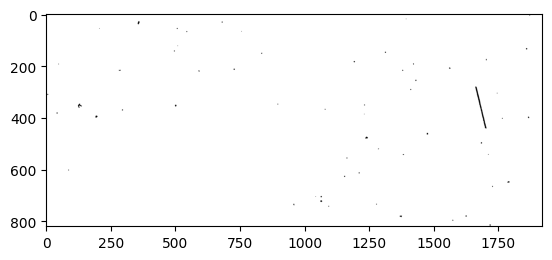

In [83]:
create_dirty_images("./test/train/", "./test/nou_test_dataset/")

2. Generate mask of target size

In [6]:
mask, binary_mask, perlin_noise = create_random_mask((height, width), df_artifacts, df_synthetic, df_per_patch_counts, use_synthetic=synthetic, rescale=rescale, uniform_sample=uniform, verbose=verbose)




c:\Users\polri\Documents\00_Uni\4rt Curs - 2024_25\TreballFiGrau\FilmDamageSimulator\damage_generator\sample.py:46: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df_sort = df.iloc[(dust_areas-i).abs().argsort()[:15]]
c:\Users\polri\Documents\00_Uni\4rt Curs - 2024_25\TreballFiGrau\FilmDamageSimulator\damage_generator\sample.py:46: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df_sort = df.iloc[(dust_areas-i).abs().argsort()[:15]]
c:\Users\polri\Documents\00_Uni\4rt Curs - 2024_25

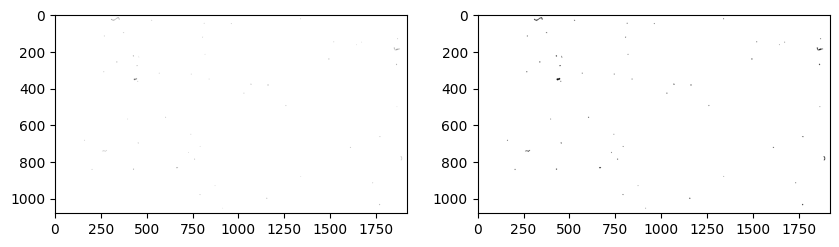

In [7]:
f, axarr = plt.subplots(1, 2, figsize=(10, 5))

axarr[0].imshow(mask, cmap='gray')
axarr[1].imshow(binary_mask, cmap='gray')


In [8]:
rgb_mask = cv.cvtColor(mask, cv.COLOR_GRAY2RGB)

non_white_mask = np.any(rgb_mask < [200, 200, 200], axis=-1)

non_white_mask.shape
plt.imshow(non_white_mask, cmap="gray")

NameError: name 'np' is not defined

In [9]:
# turn any non white pixels to black on rgb_mask
rgb_mask[non_white_mask] = [0, 0, 0]
test_image_dirty = test_image.copy()


NameError: name 'non_white_mask' is not defined

In [10]:
test_image_dirty[non_white_mask] = rgb_mask[non_white_mask]


NameError: name 'non_white_mask' is not defined

In [11]:
plt.imshow(test_image_dirty)



NameError: name 'test_image_dirty' is not defined

In [14]:
images_dir = "./test_images/"
images = os.listdir(images_dir)
for image in images:

    original_img = cv.imread(images_dir + image)
    # rgb_image = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
    mask, binary_mask, perlin_noise = create_random_mask((height, width), df_artifacts, df_synthetic, df_per_patch_counts, use_synthetic=synthetic, rescale=rescale, uniform_sample=uniform, verbose=verbose)
    rgb_mask = cv.cvtColor(mask, cv.COLOR_GRAY2RGB)

    non_white_mask = np.any(rgb_mask < [200, 200, 200], axis=-1)
    rgb_mask[non_white_mask] = [0, 0, 0]
    
    dirty_image = original_img.copy()

    dirty_image[non_white_mask] = rgb_mask[non_white_mask]

    # save dirty_image to ./dirty/
    cv.imwrite("./dirty/"+image, dirty_image,)
    cv.imwrite("./dirty/mask/"+image+"_mask.png", binary_mask)



c:\Users\polri\Documents\00_Uni\4rt Curs - 2024_25\TreballFiGrau\FilmDamageSimulator\damage_generator\sample.py:46: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df_sort = df.iloc[(dust_areas-i).abs().argsort()[:15]]
c:\Users\polri\Documents\00_Uni\4rt Curs - 2024_25\TreballFiGrau\FilmDamageSimulator\damage_generator\sample.py:46: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df_sort = df.iloc[(dust_areas-i).abs().argsort()[:15]]
c:\Users\polri\Documents\00_Uni\4rt Curs - 2024_25

KeyboardInterrupt: 

In [22]:
create_dirty_images("red_river_frames/", "./dirty_red_river/")

frame0001.png
frame0002.png
frame0003.png
frame0004.png
frame0005.png
frame0006.png
frame0007.png
frame0008.png
frame0009.png
frame0010.png
frame0011.png
frame0012.png
frame0013.png
frame0014.png
frame0015.png
frame0016.png
frame0017.png
frame0018.png
frame0019.png
frame0020.png
frame0021.png
frame0022.png
frame0023.png
frame0024.png
frame0025.png
frame0026.png
frame0027.png
frame0028.png
frame0029.png
frame0030.png
frame0031.png
frame0032.png
frame0033.png
frame0034.png
frame0035.png
frame0036.png
frame0037.png
frame0038.png
frame0039.png
frame0040.png
frame0041.png
frame0042.png
frame0043.png
frame0044.png
frame0045.png
frame0046.png
frame0047.png
frame0048.png
frame0049.png
frame0050.png
frame0051.png
frame0052.png
frame0053.png
frame0054.png
frame0055.png
frame0056.png
frame0057.png
frame0058.png
frame0059.png
frame0060.png
frame0061.png
frame0062.png
frame0063.png
frame0064.png
frame0065.png
frame0066.png
frame0067.png
frame0068.png
frame0069.png
frame0070.png
frame0071.png
frame0

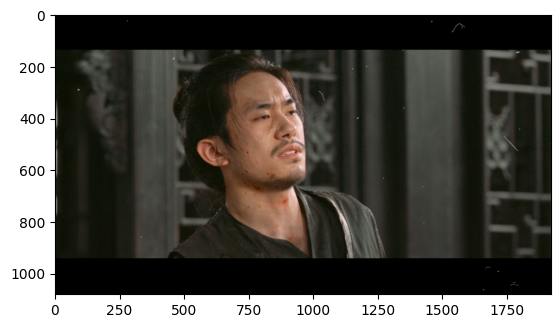

In [ ]:
# Load the clean image and the dirt/scratch mask
clean_image = cv.imread("./red_river_frames/frame0023.png", cv.IMREAD_COLOR)
# mask = cv.imread("dirt_mask.jpg", cv.IMREAD_GRAYSCALE)  # Assume it's grayscale

height, width, _ = clean_image.shape


mask, binary_mask, perlin_noise = create_random_mask((height, width), df_artifacts, df_synthetic, df_per_patch_counts, use_synthetic=synthetic, rescale=rescale, uniform_sample=uniform, verbose=verbose)
        
inverted_mask = cv.bitwise_not(mask)

# Convert the grayscale mask to 3 channels
mask_colored = cv.cvtColor(inverted_mask, cv.COLOR_GRAY2BGR)

# Blend the dirt mask with the clean image
alpha = 0.6  # Adjust transparency (higher means stronger effect)
blended = cv.addWeighted(clean_image, 1, mask_colored, alpha, 0)

plt.imshow(cv.cvtColor(blended, cv.COLOR_BGR2RGB))

In [39]:
# Load the clean image and the dirt/scratch mask
clean_image = cv.imread("./red_river_frames/frame0023.png", cv.IMREAD_COLOR)
# mask = cv.imread("dirt_mask.jpg", cv.IMREAD_GRAYSCALE)  # Assume it's grayscale

height, width, _ = clean_image.shape
# mask, binary_mask, perlin_noise = create_random_mask((height, width), df_artifacts, df_synthetic, df_per_patch_counts, use_synthetic=synthetic, rescale=rescale, uniform_sample=uniform, verbose=verbose)
# change the mask, and binary mask to a 400x400 black in the middle
mask = np.zeros((height, width), dtype=np.uint8)
mask[300:800, 300:800] = 255
binary_mask = np.zeros((height, width), dtype=np.uint8)
binary_mask[300:800, 300:800] = 255


# Resize mask to match the clean image if necessary
mask = cv.resize(mask, (clean_image.shape[1], clean_image.shape[0]))

# Normalize mask to be in range [0, 1]
mask = mask.astype(np.float32) / 255.0  

# Convert mask to 3-channel
mask_colored = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

# Darken the image where the mask is present
damaged_image = (clean_image * (1 - mask_colored)).astype(np.uint8)


### Solo test

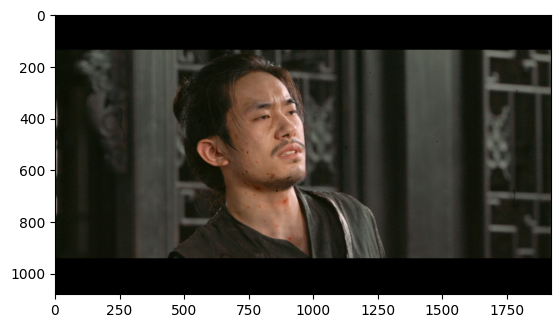

In [ ]:
import cv2
clean_image = cv.imread("./red_river_frames/frame0023.png", cv.IMREAD_COLOR)

# Load the clean image and dirt/scratch mask
mask, binary_mask, perlin_noise = create_random_mask((height, width), df_artifacts, df_synthetic, df_per_patch_counts, use_synthetic=synthetic, rescale=rescale, uniform_sample=uniform, verbose=verbose)


# Normalize the mask to range [0,1]
mask = mask.astype(np.float32) / 255.0  # White = 1, Black = 0 (dirt areas)

# Invert the mask so dirt areas become darkening factors
# darkening_mask = 1 - mask  # Now dirt is 1 (full effect), background is 0 (no effect)

# Convert to 3-channel for RGB multiplication
darkening_mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(darkening_mask_colored, cv2.COLOR_BGR2RGB))
# Apply the darkening effect
darkened_image = (clean_image * darkening_mask_colored).astype(np.uint8)


plt.imshow(cv2.cvtColor(darkened_image, cv2.COLOR_BGR2RGB))

#### Test function white square

In [58]:
def create_test_images(images_dir, output_folder):
    images = os.listdir(images_dir)
    for image in images:
        print(image)
        original_img = cv.imread(images_dir + image)
        height, width, _ = original_img.shape
        mask = np.zeros((height, width), dtype=np.uint8)
        mask[300:800, 300:800] = 255
        binary_mask = np.zeros((height, width), dtype=np.uint8)
        binary_mask[300:800, 300:800] = 255
        mask = mask.astype(np.float32) / 255.0  # White = 1, Black = 0 (dirt areas)
        # mask = cv2.bitwise_not(mask)
        mask_colored = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
        
        dirty_image = (original_img * (1 - mask_colored)).astype(np.uint8)

        cv.imwrite(output_folder+image, dirty_image,)
        cv.imwrite(output_folder+"mask/"+image+"_mask.png", binary_mask)

create_test_images("bueno_feo_malo/", "./out_bueno_feo_proves/")


leone_frame_0_0001.png
leone_frame_0_0002.png
leone_frame_0_0003.png
leone_frame_0_0004.png
leone_frame_0_0005.png
leone_frame_0_0006.png
leone_frame_0_0007.png
leone_frame_0_0008.png
leone_frame_0_0009.png
leone_frame_0_0010.png
leone_frame_0_0011.png
leone_frame_0_0012.png
leone_frame_0_0013.png
leone_frame_0_0014.png
leone_frame_0_0015.png
leone_frame_0_0016.png
leone_frame_0_0017.png
leone_frame_0_0018.png
leone_frame_0_0019.png
leone_frame_0_0020.png
leone_frame_0_0021.png
leone_frame_0_0022.png
leone_frame_0_0023.png
leone_frame_0_0024.png
leone_frame_0_0025.png
leone_frame_0_0026.png
leone_frame_0_0027.png
leone_frame_0_0028.png
leone_frame_0_0029.png
leone_frame_0_0030.png
leone_frame_0_0031.png
leone_frame_0_0032.png
leone_frame_0_0033.png
leone_frame_0_0034.png
leone_frame_0_0035.png
leone_frame_0_0036.png
leone_frame_0_0037.png
leone_frame_0_0038.png
leone_frame_0_0039.png
leone_frame_0_0040.png
leone_frame_0_0041.png
leone_frame_0_0042.png
leone_frame_0_0043.png
leone_frame

### **Execution**

In [4]:
factor = 20
df_per_patch_counts_rescaled = df_per_patch_counts.copy()
df_per_patch_counts_rescaled['Counts'] = df_per_patch_counts_rescaled['Counts'] * factor
# df_per_patch_counts_rescaled[df_per_patch_counts_rescaled['Type']!='dirt', 'Counts'] = df_per_patch_counts_rescaled[df_per_patch_counts_rescaled['Type']!='dirt', 'Counts'] * factor
# df_per_patch_counts_rescaled[df_per_patch_counts_rescaled['Type']=='dirt', 'Counts'] = df_per_patch_counts_rescaled[df_per_patch_counts_rescaled['Type']=='dirt', 'Counts'] * factor//2


In [5]:
df_per_patch_counts_rescaled[df_per_patch_counts_rescaled['Type']=='long hair', 'Counts'] = df_per_patch_counts_rescaled['Counts'] 

TypeError: unhashable type: 'Series'

In [21]:
# multiply the counts of scratches by 2 (Types == scratches)
df_per_patch_counts_rescaled_more_hair.loc[df_per_patch_counts_rescaled_more_hair['Type'] == 'long hair', 'Counts'] *= 3

In [5]:
def generate_n_masks(height, width, n, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for i in range(n):
        print(f"Generating mask {i}")

        mask, binary_mask, perlin_noise = create_random_mask_with_transparency((height, width), df_artifacts, df_synthetic, df_per_patch_counts_rescaled, use_synthetic=synthetic, rescale=rescale, uniform_sample=uniform, verbose=verbose, alpha_prob = 0.7)
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        print(f"Saving mask {i}")
        cv.imwrite(output_folder+"mask_"+str(i)+".png", mask)

In [6]:
img = cv.imread("./figures/bueno_feo_malo_frame_0001.png")
height, width = img.shape[:2]

In [7]:
print(height, width)

816 1920


In [8]:
mask = generate_n_masks(1600, 1920, 20000, "./biggest_big_masks/")
import requests
requests.post("https://ntfy.sh/tfg-pol", data = "Finished generating masks",
            headers={"title": "Mask generation",})

Generating mask 0
Saving mask 0
Generating mask 1
Saving mask 1
Generating mask 2
Saving mask 2
Generating mask 3
Saving mask 3
Generating mask 4
Saving mask 4
Generating mask 5
Saving mask 5
Generating mask 6
Saving mask 6
Generating mask 7
Saving mask 7
Generating mask 8
Saving mask 8
Generating mask 9
Saving mask 9
Generating mask 10
Saving mask 10
Generating mask 11
Saving mask 11
Generating mask 12
Saving mask 12
Generating mask 13
Saving mask 13
Generating mask 14
Saving mask 14
Generating mask 15
Saving mask 15
Generating mask 16
Saving mask 16
Generating mask 17
Saving mask 17
Generating mask 18
Saving mask 18
Generating mask 19
Saving mask 19
Generating mask 20
Saving mask 20
Generating mask 21
Saving mask 21
Generating mask 22
Saving mask 22
Generating mask 23
Saving mask 23
Generating mask 24
Saving mask 24
Generating mask 25
Saving mask 25
Generating mask 26
Saving mask 26
Generating mask 27
Saving mask 27
Generating mask 28
Saving mask 28
Generating mask 29
Saving mask 29


libpng error: Write Error


Saving mask 60
Generating mask 61


libpng error: Write Error


Saving mask 61
Generating mask 62
Saving mask 62
Generating mask 63
Saving mask 63
Generating mask 64
Saving mask 64
Generating mask 65
Saving mask 65
Generating mask 66
Saving mask 66
Generating mask 67
Saving mask 67
Generating mask 68
Saving mask 68
Generating mask 69
Saving mask 69
Generating mask 70
Saving mask 70
Generating mask 71
Saving mask 71
Generating mask 72
Saving mask 72
Generating mask 73
Saving mask 73
Generating mask 74
Saving mask 74
Generating mask 75
Saving mask 75
Generating mask 76
Saving mask 76
Generating mask 77
Saving mask 77
Generating mask 78
Saving mask 78
Generating mask 79
Saving mask 79
Generating mask 80
Saving mask 80
Generating mask 81
Saving mask 81
Generating mask 82
Saving mask 82
Generating mask 83
Saving mask 83
Generating mask 84
Saving mask 84
Generating mask 85
Saving mask 85
Generating mask 86
Saving mask 86
Generating mask 87
Saving mask 87
Generating mask 88
Saving mask 88
Generating mask 89
Saving mask 89
Generating mask 90
Saving mask 90

<Response [200]>

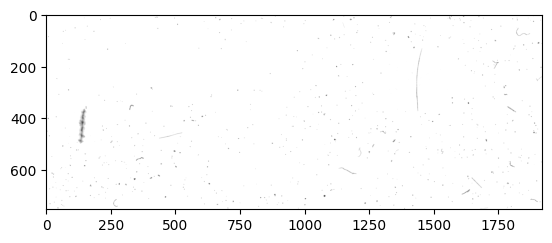

In [26]:
plt.imshow(mask, cmap='gray')

In [19]:
def create_dirty_images(images_dir, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    if not os.path.exists(output_folder+"train"):
        os.makedirs(output_folder+"train")
    if not os.path.exists(output_folder+"train_mask"):
        os.makedirs(output_folder+"train_mask")    
    images = os.listdir(images_dir)
    masks = os.listdir("./test/train_dirtytrain_mask/")
    for image, mask in zip(images, masks):
        original_img = cv.imread(images_dir + image)
        binary_mask = cv.imread("./test/train_dirtytrain_mask/"+mask, cv.IMREAD_GRAYSCALE)
        print(mask)
        # plt.imshow(mask)
        plt.imshow(binary_mask, cmap='gray')
        darkening_mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        dirty_image = (original_img * darkening_mask_colored).astype(np.uint8)
        blurred_img = np.stack([gaussian(dirty_image[..., i], sigma=1) for i in range(dirty_image.shape[-1])], axis=-1)
        blurred_img = img_as_ubyte(blurred_img)
        img_dirty_final = dirty_image.copy()
        # img_dirty_final[binary_mask < 230] = blurred_img[binary_mask < 230]
        # cv.imwrite(output_folder+"train/"+image, img_dirty_final,)
        # cv.imwrite(output_folder+"train_mask/"+image+"_mask.png", binary_mask)
        # img_dirty_final = cv2.cvtColor(img_dirty_final, cv2.COLOR_BGR2RGB)

In [11]:
create_dirty_images("./test/train/", "./test/new_loader_test")

TypeError: create_dirty_images() takes 0 positional arguments but 2 were given

In [5]:
import cv2

In [55]:
def create_dirty_images(): 
    image = "./informe/images/image1.png"
    mask = "./informe/mask/mask1.png"
    original_img = cv.imread(image)
    binary_mask = cv.imread(mask, cv.IMREAD_GRAYSCALE)
    darkening_mask_colored = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
    dirty_image = (original_img * darkening_mask_colored).astype(np.uint8)
    blurred_img = np.stack([gaussian(dirty_image[..., i], sigma=3) for i in range(dirty_image.shape[-1])], axis=-1)
    blurred_img = img_as_ubyte(blurred_img)
    img_dirty_final = dirty_image.copy()
    img_dirty_final[binary_mask < 230] = blurred_img[binary_mask < 230]
    # img_dirty_final = cv2.cvtColor(img_dirty_final, cv2.COLOR_BGR2RGB)
    # dirty_image = cv2.cvtColor(dirty_image, cv2.COLOR_BGR2RGB)
    fig, arr = plt.subplots(1, 2, figsize=(30, 5))
    arr[0].imshow(img_dirty_final)
    arr[1].imshow(dirty_image)


    cv.imwrite("./informe/image_blur.png", img_dirty_final,)
    cv.imwrite("./informe/image_binary.png", dirty_image)
    # img_dirty_final = cv2.cvtColor(img_dirty_final, cv2.COLOR_BGR2RGB)

In [56]:
from skimage.io import imread
from skimage.transform import resize
from skimage.util import random_noise
from skimage.morphology import dilation, disk
from skimage.filters import gaussian
from skimage import img_as_ubyte

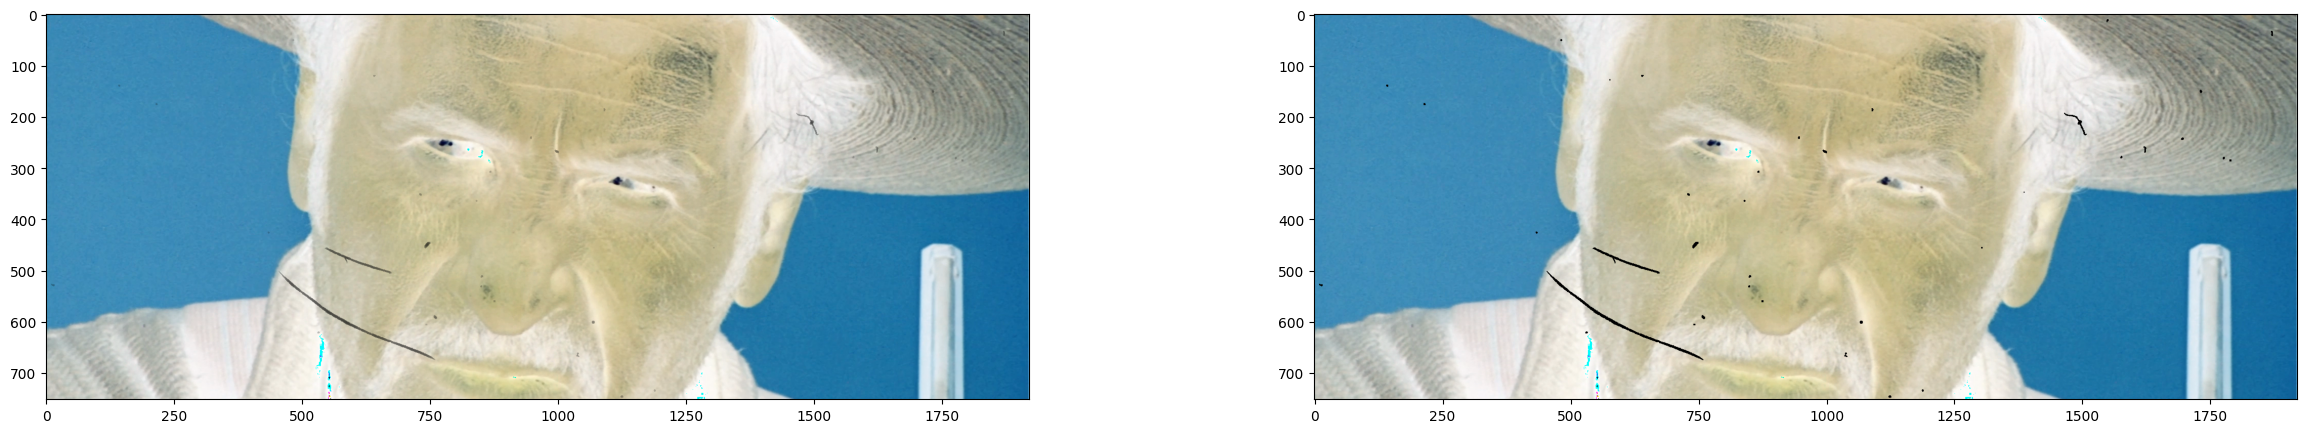

In [57]:
create_dirty_images()

In [ ]:

image = "./informe/images/image1.png"
mask = "./informe/mask/mask1.png"
original_img = cv.imread(image)
mask = cv.imread(mask)
mask_converted = mask.astype(np.float32) / 255.0
darkening_mask_colored = np.stack([mask_converted] * 3, axis=-1)
img_dirty = (img * darkening_mask_colored).astype(np.uint8)
mask_resized_binary = np.where(mask_resized > 0.9, 1, 0)
# mask_resized = np.where(mask_resized > 0.9, 1, 0)
# Convert skimage mask to uint8 if needed
mask_resized_uint8 = img_as_ubyte(mask_resized > 0)  # Ensure binary mask is uint8

# Step 1: Dilate the mask to expand the dirt spots (10-pixel radius)
# selem = disk(10)  # Structuring element of radius ~10
# mask_dilated = dilation(mask_resized, selem).astype(np.uint8)  # Skimage dilation

# Step 2: Apply Gaussian blur to the expanded region
if img_dirty.ndim == 3:  # Check if it's a color image
    blurred_img = np.stack([gaussian(img_dirty_resized[..., i], sigma=self.sigma) for i in range(img_dirty_resized.shape[-1])], axis=-1)